# Sentralgrenseteoremet

I denne notatboken illustrerer vi hvordan gjennomsnittet av $n > 30$ uavhengige stokastiske variabler fra samme sannsynlighetsfordeling ("identisk fordelte") vil kunne tilnærmes med en normalfordeling.

Fra formelarket: 

Dersom $X_1, X_2, \ldots, X_n$ er uavhengige stokastiske variabler fra samme sannsynlighetsfordeling med forventning $\text{E}(X_i) = \mu$ og varians $\text{Var}(X_i) = \sigma^2$, for $i = 1, \ldots, n$, og dersom $n > 30$, så er 

$$ \bar{X} = \frac{X_1 + X_2 + \ldots + X_n}{n} \text{ tilnærmet } \text{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right) $$

In [2]:
import numpy as np
from scipy import stats # statistikk-modulen i scipy-pakken
import matplotlib.pyplot as plt # plotting

Det følgende eksempelet med Poissonfordelte stokastiske variabler illustrer Oppgave 6 i Øving 6

In [19]:
# illustrasjon av sentralgrenseteoremet
# koden er generert ved hjelp av ChatGPT

mu = 3  # forventningsverdi i Poissonfordelingen
n = 34  # antall uavhengige Poissonfordelte variabler

# En funksjon som trekker observasjoner av de n variablene
# og returnerer gjennomsnittet:
def simulate_poisson_average(nsim, n, mu):
    averages = []  

    for i in range(nsim):
        # Trekk observasjoner fra n uavhengige Poissonfordelte variabler
        poisson_values = np.random.poisson(mu, size=n)

        # Regn ut gjennomsnittet
        average = np.mean(poisson_values)
        averages.append(average)

    return averages

# kjør simulering
nsim = 1000 # antall simuleringer
averages = simulate_poisson_average(nsim, n, mu)

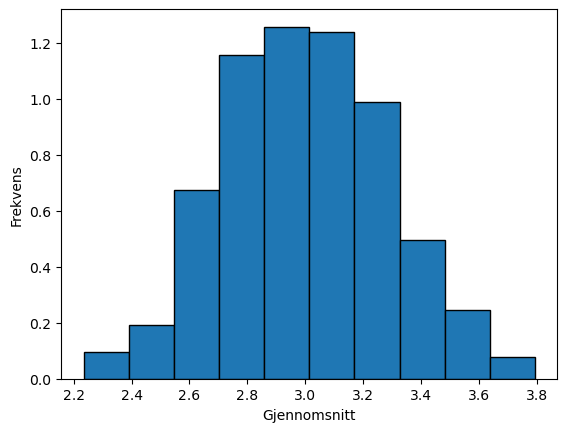

In [17]:
# plott et histogram over de nsim simulerte gjennomsnittene
plt.hist(averages, bins=10, edgecolor='black', density = True)
plt.xlabel('Gjennomsnitt')
plt.ylabel('Frekvens')
plt.show()

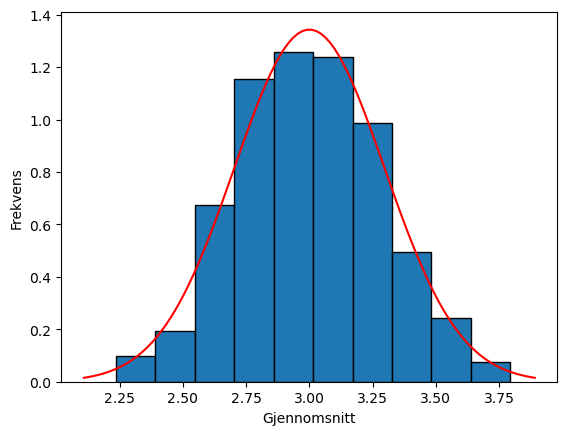

In [18]:
# Legg på normalfordelingskurve med forventning og standardavvik i henhold til sentralgrenseteoremet

forventning = mu
standardavvik = np.sqrt(mu/n) # OBS: mu fordi i Poissonfordelingen er Var(X) = E(X)
x = np.linspace(forventning - 3*standardavvik,forventning + 3*standardavvik, 100)
normal_curve = stats.norm.pdf(x, forventning, standardavvik)

plt.hist(averages, bins=10, edgecolor='black', density = True)
plt.xlabel('Gjennomsnitt')
plt.ylabel('Frekvens')
plt.plot(x, normal_curve, label='Normal Curve', color='red')
plt.show()